### __Titanic - Machine Learning from Disaster__

## The Challenge

#### The sinking of the Titanic is one of the most infamous shipwrecks in history.

#### On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

#### While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

#### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Dataset Description


#### The data has been split into two groups:

+ training set (train.csv)
+ test set (test.csv)

#### The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

#### The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## Data Dictionary

#### The Variables of our training set are:

#### __Survived__; 0 = No, 1 = Yes

#### __Pclass__;Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

#### __Sex__

#### __Age__; Age in years 	

#### __Sibsp__; # of siblings / spouses aboard the Titanic 	

#### __Parch__; # of parents / children aboard the Titanic 	

#### __Ticket__;Ticket number 	

#### __Fare__; Passenger fare 	

#### __Cabin__; Cabin number 	

#### __Embarked__; Port of Embarkation: 	C = Cherbourg, Q = Queenstown, S = Southampton



In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [48]:
train_set = pd.read_csv("/kaggle/input/titanic/train.csv")
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
test_set = pd.read_csv("/kaggle/input/titanic/test.csv")
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
women = train_set.loc[train_set.Sex == 'female']["Survived"]

rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [51]:
men = train_set.loc[train_set.Sex == 'male']["Survived"]

rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


## __1. Data Preprocessing__

In [52]:
train_set.shape

(891, 12)

In [53]:
test_set.shape

(418, 11)

In [54]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
avg_age_train = train_set['Age'].mean()
train_set['Age'].fillna(avg_age_train, inplace=True)

avg_age_test = test_set['Age'].mean()
test_set['Age'].fillna(avg_age_test, inplace=True)

train_set.info()
test_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [58]:
train_set.duplicated().sum()

0

In [59]:
test_set.duplicated().sum()

0

#### 1.A Descriptive Statistics

In [60]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## __2. Exploratory Data Analysis__

#### In this section, we will learn about the distribution of the data, the possible correlation between features, and the relationship between features and the target variable.

### __2.1 Relation between survivals and deaths__

In [62]:
#0: died; 1:survived
train_set["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

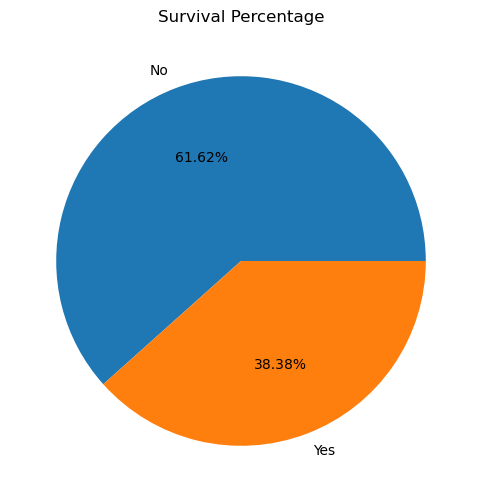

In [63]:
#Pie chart

plt.figure(figsize=(10,6))
plt.pie(train_set["Survived"].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('Survival Percentage')
plt.show()

#### The pie chart shows that almost two thirds of the passengers died in the accident.

### __2.2 Relation between women and men died__

In [64]:
#women_died = train_set.loc[train_set.Sex == 'female'][train_set.Survived == 0]
women = pd.DataFrame(women)
women_died = women.loc[women.Survived == 0]

men = pd.DataFrame(men)
men_died = men.loc[men.Survived == 0]

rate_women_died = len(women_died["Survived"])/(len(women_died["Survived"]) + len(men_died["Survived"]))
print("Percentage of women among deaths:", rate_women_died)
rate_men_died = len(men_died["Survived"])/(len(women_died["Survived"]) + len(men_died["Survived"]))
print("Percentage of men among deaths:", rate_men_died)

Percentage of women among deaths: 0.14754098360655737
Percentage of men among deaths: 0.8524590163934426


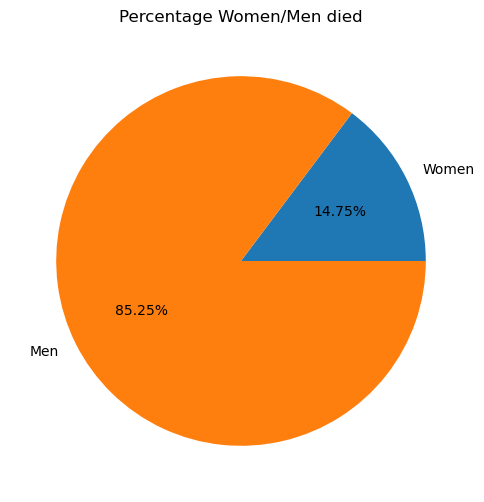

In [65]:
plt.figure(figsize=(10,6))
plt.pie([rate_women_died,rate_men_died], labels=['Women', 'Men'], autopct='%1.2f%%')
plt.title('Percentage Women/Men died')
plt.show()

#### Much more men than women died in the Titanic

### __2.3 Distribution by Sex__

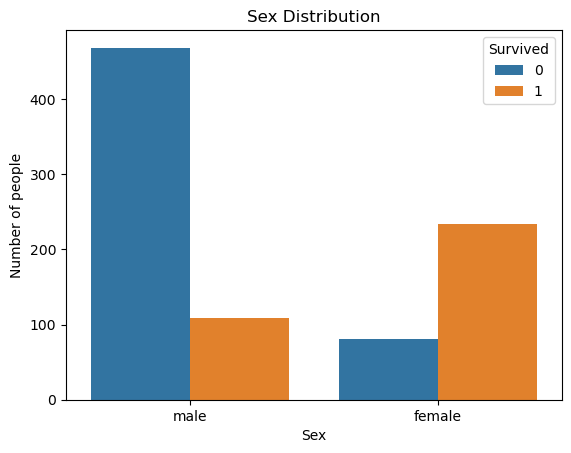

In [66]:
#Gender and survival

sns.countplot(data=train_set, x='Sex', hue='Survived')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

#### Only 100 men survived and less than 100 women died (in the train set).

### __2.4 Distribution by Age__

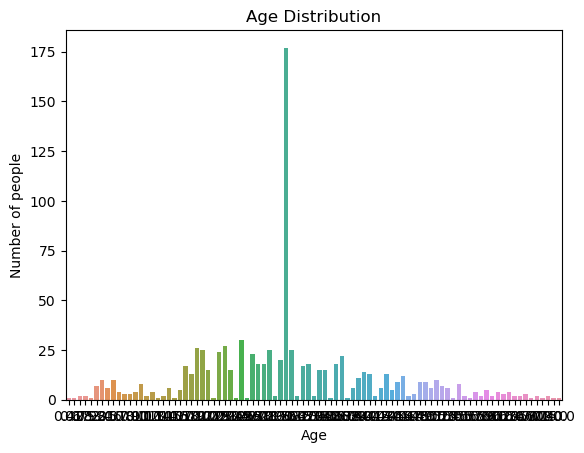

In [67]:
sns.countplot(data=train_set, x='Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

#### The most seen age, with a huge difference, is 30 years old, and were the people who died mostly.

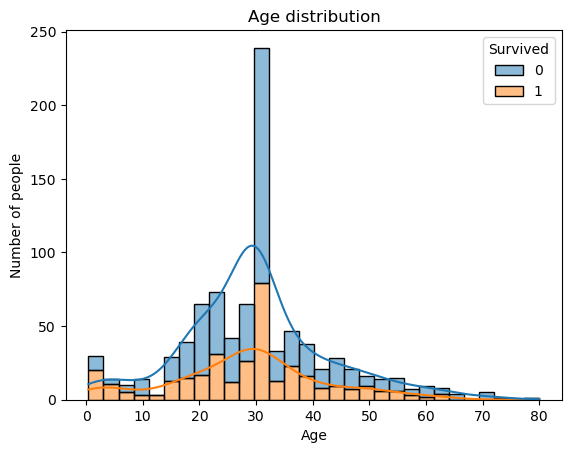

In [68]:
sns.histplot(data=train_set, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

Text(0.5, 1.0, 'Statiscal distribution for Age')

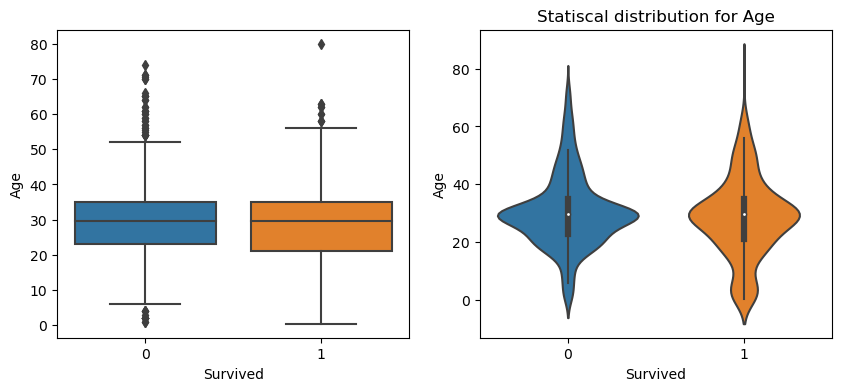

In [69]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=train_set, x='Survived', y='Age', ax=ax[0])
sns.violinplot(data=train_set, x='Survived', y='Age', ax=ax[1])
plt.title('Statiscal distribution for Age')


#### There is no difference between de median age of both groups, above 30 years. We can extract from the boxplot that all children under five died in the accident. Aged people were a bit more likely to die, but, instead, much of them was saved, even the most ancient passenger in Titanic who managed to survive. Finally, thanks to the violin plot we know that Age distribution of died people were more spread than passengers who survived.

### __2.5 Distribution by Siblings__

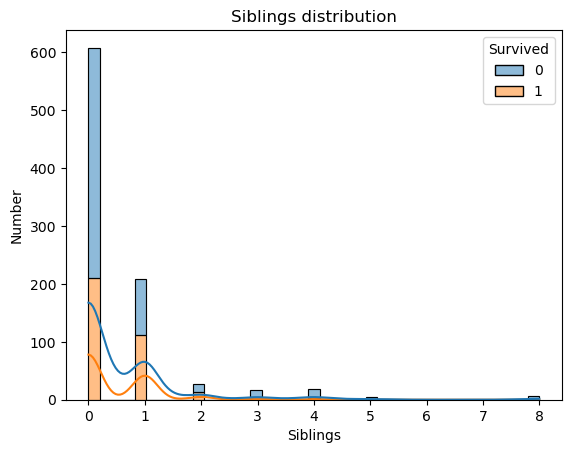

In [70]:
sns.histplot(data=train_set, x='SibSp', hue='Survived', multiple='stack', kde=True)
plt.title('Siblings distribution')
plt.xlabel('Siblings')
plt.ylabel('Number')
plt.show()


#### The normal was have any or 1 sibling. Eight siblings was the maximum.

### __2.6 Distribution by Acquaintance of 1st Grade (parents or children)__

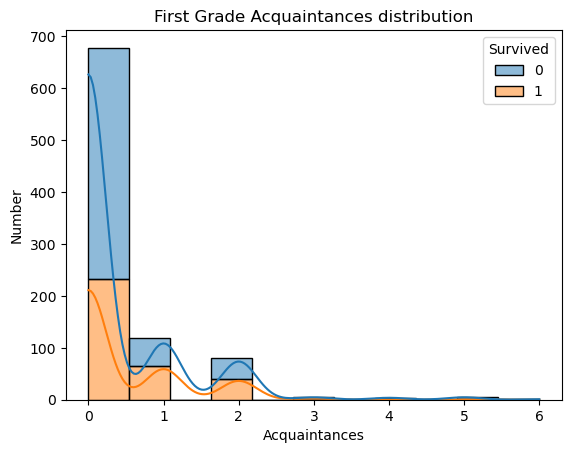

In [71]:
sns.histplot(data=train_set, x='Parch', hue='Survived', multiple='stack', kde=True)
plt.title('First Grade Acquaintances distribution')
plt.xlabel('Acquaintances')
plt.ylabel('Number')
plt.show()

#### Between 0 and 1 acquaintances was the standard among the passengers.

### __2.7 Correlation Between Feautures Variables__

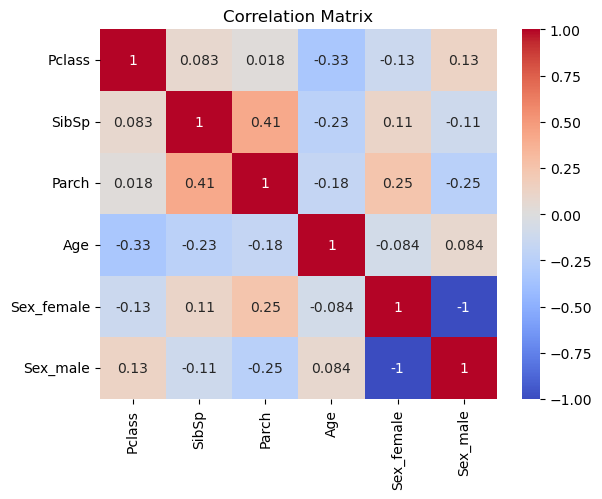

In [72]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]

#Codifying the categorical variable (only them)
train_set_features = pd.get_dummies(train_set[features])
sns.heatmap(train_set_features.corr(), annot=True, cmap='coolwarm')
#sns.heatmap(train_set[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### There is no significative correlation among the feature variables. Next step will be the prediction of the dependent variable, 'Survived', with an appropiate classification model.

## __3. Modeling__

#### For predicting the survival of passengers we will use the following models, trying to determinate the most appropiate for our problem of classification:

+ __Decision Tree Classifier__
+ __Random Forest Classifier__


### __3.1 Decision Tree__

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

y_train = train_set ["Survived"]

#We need to vectorize 
X_train = pd.get_dummies(train_set[features])
X_test = pd.get_dummies(test_set[features])

#Creating Decision Tree object
tree = DecisionTreeClassifier()

#defining hyperparameter range
param_grid = {
    'max_depth':[2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion':  ['gini', 'entropy', 'log_loss'],
    'random_state': [0,42]
    }

#Creating GridSearch object
grid_tree = GridSearchCV(tree, param_grid, cv = 5, scoring = 'roc_auc')

#Fitting the GridSearch objecto to the training set
grid_tree.fit(X_train, y_train)

#Printing the best hyperparamemeters for Decision Tree
print('Best parameters are: ', grid_tree.best_params_)

Best parameters are:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'random_state': 42}


#### Having these parameters into account we feed the model with them.

In [86]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, random_state=42)
tree

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

#### Training the model

In [87]:
#training the model
tree.fit(X_train, y_train)

#training accuracy
tree.score(X_train, y_train)

0.8507295173961841

#### Predicting Survival from test set

In [76]:
yhat_tree = tree.predict(X_test)
yhat_tree[:5]

array([0, 0, 0, 0, 1])

### __3.2 Random Forest__

In [77]:
from sklearn.ensemble import RandomForestClassifier

#Creating Random Forest Object
random_tree = RandomForestClassifier()

#Creating GridSearch object
random_grid_tree = GridSearchCV(random_tree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs=-1)

#Fitting the GridSearch object to the training set
random_grid_tree.fit(X_train,y_train)

#Printing the best hyperparameters for Random Forest
print('Best parameters are: ', random_grid_tree.best_params_)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best parameters are:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'random_state': 42}


#### Having these parameters into account we feed the model with them.

In [78]:
random_tree = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6, random_state=42)
random_tree

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       random_state=42)

#### Training the model

In [83]:
#Training the model
random_tree.fit(X_train, y_train)

#Training accuracy
random_tree.score(X_train, y_train)

0.8518518518518519

#### Predicting Survival from test set

In [80]:
yhat_random = random_tree.predict(X_test)
yhat_random[:5]

array([0, 0, 0, 0, 0])

## __4. Conclusion__

##### From the Exploratory Data Analysis we obtained that the Survived dependent variable could be predicted based on the following variables:

##### 1. Age
##### 2. Sex
##### 3. Class
##### 4. Number of siblings onboard
##### 5. Number of parents and children onboard

##### As we see before, the accuracy of the model is better in Decision Tree than in Random Tree Classifier. Thus, we will use the prediction of the first for our output.

## __5. Preparing the output__

In [89]:
output = pd.DataFrame({'PassengerId': test_set.PassengerId, 'Survived': yhat_tree})
output.head()
output.to_csv('submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
